In [68]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

HOUSING_PATH = os.path.join("datasets", "housing")

In [69]:
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
pd.read_csv(csv_path)

housing = pd.read_csv(csv_path)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

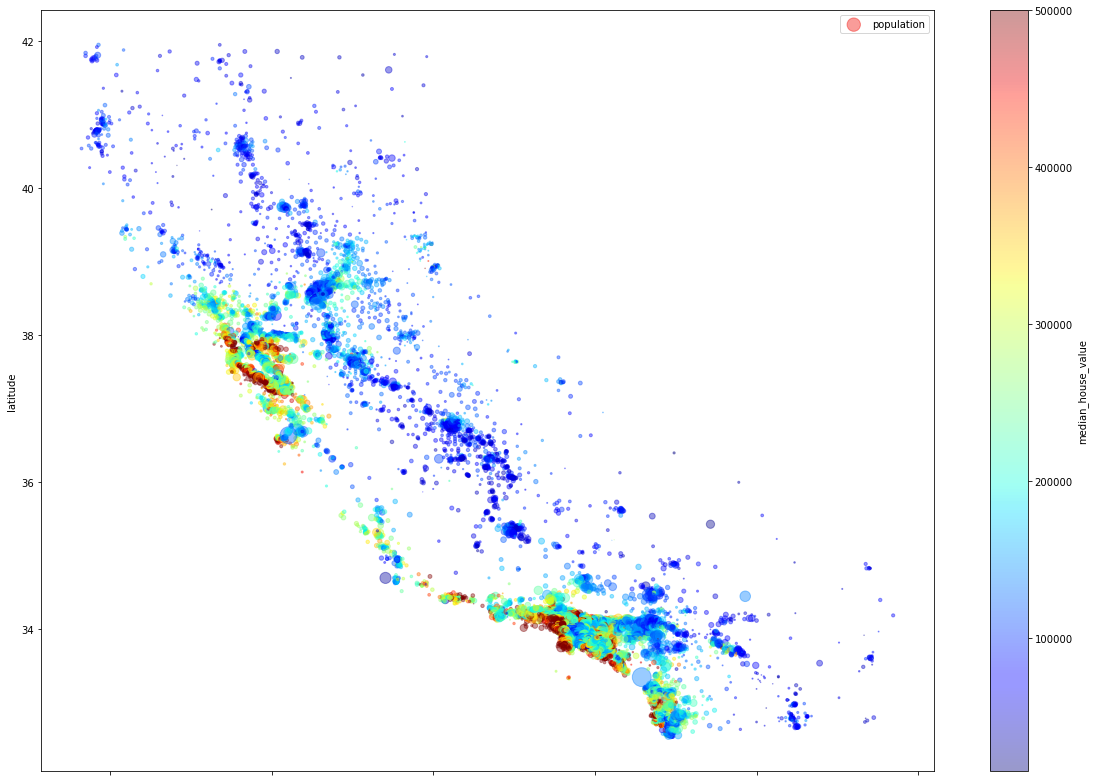

In [86]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing['population'] / 100, label='population',
             figsize=(20, 14), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [71]:
enc = LabelEncoder()
housing['ocean_proximity'] = enc.fit_transform(housing['ocean_proximity'])
new_hou = housing.convert_dtypes()
new_hou=housing.fillna(housing.mean())

X = new_hou.drop('median_house_value',axis = 1)
y = new_hou['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
res = reg.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
new_tree = DecisionTreeRegressor()
new_tree.fit(X_train, y_train)

predictions = new_tree.predict(X_test)

tree_mse = mean_squared_error(y_test, predictions)


In [74]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, res)
lin_rmse = np.sqrt(lin_mse)

In [75]:
print(lin_rmse)
print(tree_mse)

70103.0496160971
4590717279.37478


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(new_tree, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.std())

3936.7172822704015


In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.std())

3166.9774974564384
